WQD 7003 - Alternative Assessment 1<br>
Name: Kar Hong Sam<br>
Matric No.: S2191926

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('BreastCancer.csv')
df.head

<bound method NDFrame.head of      radius  texture  perimeter    area  smoothness  compactness  concavity  \
0    25.380    17.33     184.60  2019.0     0.16220      0.66560     0.7119   
1    24.990    23.41     158.80  1956.0     0.12380      0.18660     0.2416   
2    23.570    25.53     152.50  1709.0     0.14440      0.42450     0.4504   
3    14.910    26.50      98.87   567.7     0.20980      0.86630     0.6869   
4    22.540    16.67     152.20  1575.0     0.13740      0.20500     0.4000   
..      ...      ...        ...     ...         ...          ...        ...   
564  25.450    26.40     166.10  2027.0     0.14100      0.21130     0.4107   
565  23.690    38.25     155.00  1731.0     0.11660      0.19220     0.3215   
566  18.980    34.12     126.70  1124.0     0.11390      0.30940     0.3403   
567  25.740    39.42     184.60  1821.0     0.16500      0.86810     0.9387   
568   9.456    30.37      59.16   268.6     0.08996      0.06444     0.0000   

     concave points  

In [3]:
#check missing values
df.isnull().sum()

radius               0
texture              0
perimeter            0
area                 0
smoothness           0
compactness          0
concavity            0
concave points       0
symmetry             0
fractal dimension    0
BreastCancer         0
dtype: int64

In [4]:
df.corr()

,radius,texture,perimeter,area,smoothness,compactness,concavity,concave points,symmetry,fractal dimension,BreastCancer
radius,1.000000,0.359921,0.993708,0.984015,0.216574,0.475820,0.573975,0.787424,0.243529,0.093492,-0.776454
texture,0.359921,1.000000,0.365098,0.345842,0.225429,0.360832,0.368366,0.359755,0.233027,0.219122,-0.456903
perimeter,0.993708,0.365098,1.000000,0.977578,0.236775,0.529408,0.618344,0.816322,0.269493,0.138957,-0.782914
area,0.984015,0.345842,0.977578,1.000000,0.209145,0.438296,0.543331,0.747419,0.209146,0.079647,-0.733825
smoothness,0.216574,0.225429,0.236775,0.209145,1.000000,0.568187,0.518523,0.547691,0.493838,0.617624,-0.421465
compactness,0.475820,0.360832,0.529408,0.438296,0.568187,1.000000,0.892261,0.801080,0.614441,0.810455,-0.590998
concavity,0.573975,0.368366,0.618344,0.543331,0.518523,0.892261,1.000000,0.855434,0.532520,0.686511,-0.659610
concave points,0.787424,0.359755,0.816322,0.747419,0.547691,0.801080,0.855434,1.000000,0.502528,0.511114,-0.793566
symmetry,0.243529,0.233027,0.269493,0.209146,0.493838,0.614441,0.532520,0.502528,1.000000,0.537848,-0.416294
fractal dimension,0.093492,0.219122,0.138957,0.079647,0.617624,0.810455,0.686511,0.511114,0.537848,1.000000,-0.323872


In [5]:
corr_with_target = df.corr()['BreastCancer'].abs().sort_values(ascending=False)

# Print the correlation values
print(corr_with_target)

BreastCancer         1.000000
concave points       0.793566
perimeter            0.782914
radius               0.776454
area                 0.733825
concavity            0.659610
compactness          0.590998
texture              0.456903
smoothness           0.421465
symmetry             0.416294
fractal dimension    0.323872
Name: BreastCancer, dtype: float64


The top 5 features that inversely corr are `concave points`, `perimeter`, `radius`, `area` and `concavity`.

Accuracy for top 1 features: 0.9064327485380117
Accuracy for top 2 features: 0.9298245614035088
Accuracy for top 3 features: 0.935672514619883


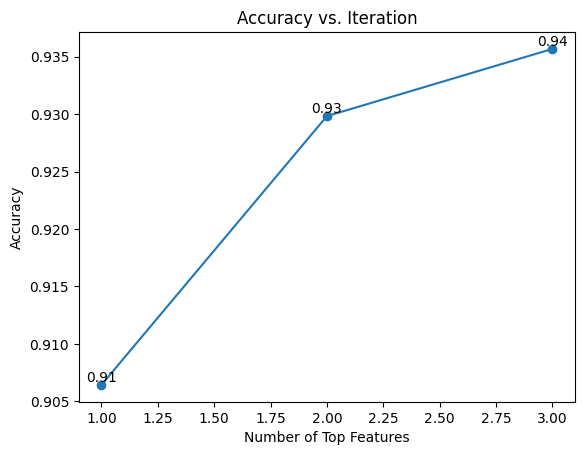

In [6]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Define the number of top features to use
num_top_features = [1, 2, 3]

# Split the data into training and test sets
X = df.drop('BreastCancer', axis=1)  # Features
y = df['BreastCancer']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize lists to store accuracy and iteration values
accuracies = []
iterations = []

# Train Random Forest Classifier with different numbers of top features using a for loop
for num_features in num_top_features:
    # Select the top features based on correlation or any other criterion
    selected_features = X_train.corrwith(y_train).abs().nlargest(num_features).index
    X_train_selected = X_train[selected_features]
    X_test_selected = X_test[selected_features]

    model = RandomForestClassifier(n_estimators=50, random_state=42)
    model.fit(X_train_selected, y_train)

    # Make predictions on the test set
    y_pred = model.predict(X_test_selected)

    # Calculate the accuracy
    accuracy = accuracy_score(y_test, y_pred)

    # Append accuracy and iteration values to the lists
    accuracies.append(accuracy)
    iterations.append(num_features)

    if num_features <= 3:
        print(f"Accuracy for top {num_features} features: {accuracy}")

    # Break the loop after 3 iterations
    if num_features == 3:
        break

# Plotting the graph
plt.plot(iterations, accuracies, marker='o')
plt.xlabel('Number of Top Features')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Iteration')

for i in range(len(iterations)):
    plt.text(iterations[i], accuracies[i], f'{accuracies[i]:.2f}', ha='center', va='bottom')

plt.show()


Based on the line chart, the more the features, the higher the accuracy of the Random Forest Classifier. This is due to the fact that model training requires more features to capture the complexity of the data, resulting in a better prediction.